# Model Distribution Analysis

In [1]:
import random
import pickle
from collections import defaultdict

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.iolib.summary2 import summary_col

from small_crisis import CrisisModel, CrisisAgent, CrisisWorld

from consul.agent_types.rl_agent import RLAgent
from consul.agent_types.cbr_agent import CaseBased_RLAgent

# Experiments 1.1, 1.2

In [2]:
with open("data_out/ex_1.1.pickle", "rb") as f:
    rl_table, cb_table = pickle.load(f)

In [3]:
def get_mean(group):
    return len(group[(group.Step>50) & (group.quality==1)])/len(group[group.Step>50])

(0, 1)

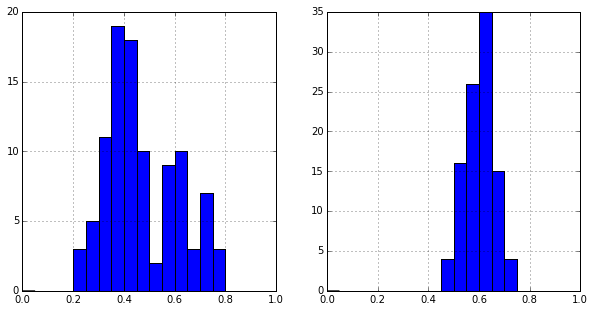

In [4]:
rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

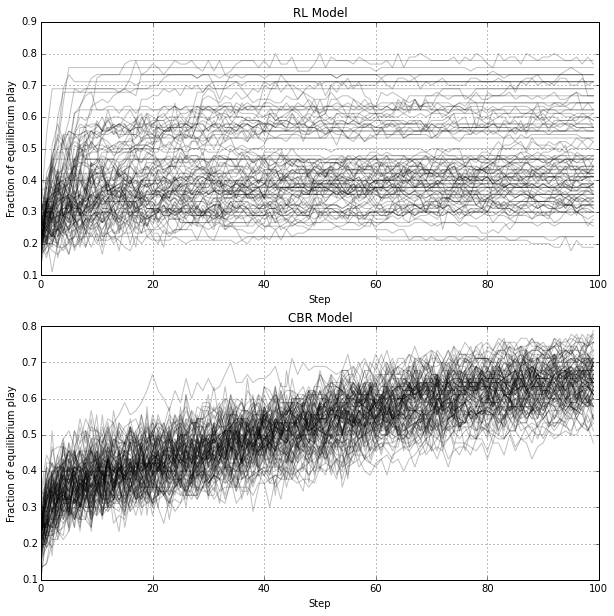

In [5]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.25)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.25)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


In [ ]:
with open("data_out/ex_1.2.pickle", "rb") as f:
    rl_table2, cb_table2 = pickle.load(f)

rl_means = rl_table2.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table2.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table2.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.25)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table2.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.25)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


# Experiment 1.3

In [5]:
with open("data_out/ex_1.3.pickle", "rb") as f:
    rl_table, cb_table, seed_table = pickle.load(f)

(0, 1)

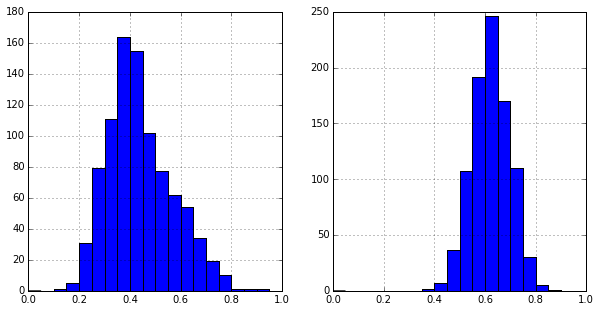

In [6]:
rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

In [7]:
both_means = pd.DataFrame({"RL": rl_means, "CB": cb_means})
both_means["Delta"] = both_means.CB - both_means.RL

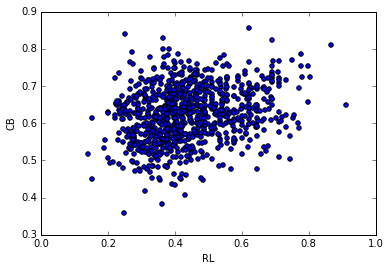

In [8]:
both_means.plot(kind='scatter', x="RL", y="CB")

0.182813758114


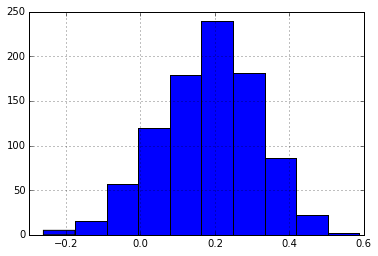

In [9]:
both_means.Delta.hist()
print(both_means.Delta.mean())

In [11]:
both_means.head()

,CB,RL,Delta
Seed,,,
1128,0.621769,0.341950,0.279819
1151,0.629025,0.200000,0.429025
1438,0.640816,0.385714,0.255102
1579,0.630385,0.377324,0.253061
1588,0.547846,0.297506,0.250340


In [14]:
scipy.stats.mstats.normaltest(both_means.Delta)

(9.3580505835305541, 0.0092880626275350948)

In [41]:
for col in ["RL", "CB", "Delta"]:
    k = scipy.stats.mstats.kurtosis(both_means[col].values)
    s = scipy.stats.mstats.skew(both_means[col].values).data.max()
    print("{}: Skew: {:.2f}, Kurtosis: {:.2f}".format(col, s, k))

RL: Skew: 0.57, Kurtosis: -0.04
CB: Skew: -0.07, Kurtosis: -0.05
Delta: Skew: -0.25, Kurtosis: -0.03


In [42]:
scipy.stats.mstats.kurtosis?

In [10]:
# Test whether the mean of Delta is 0
scipy.stats.ttest_1samp(both_means.Delta, 0)

(41.931285987350996, 2.0330226795889567e-214)

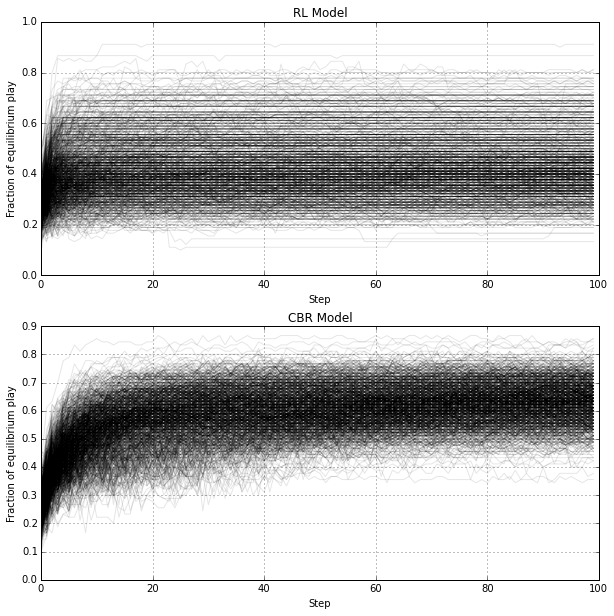

In [10]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.1)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.1)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


In [11]:
rl_qualities = rl_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")
    
cb_qualities = cb_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")

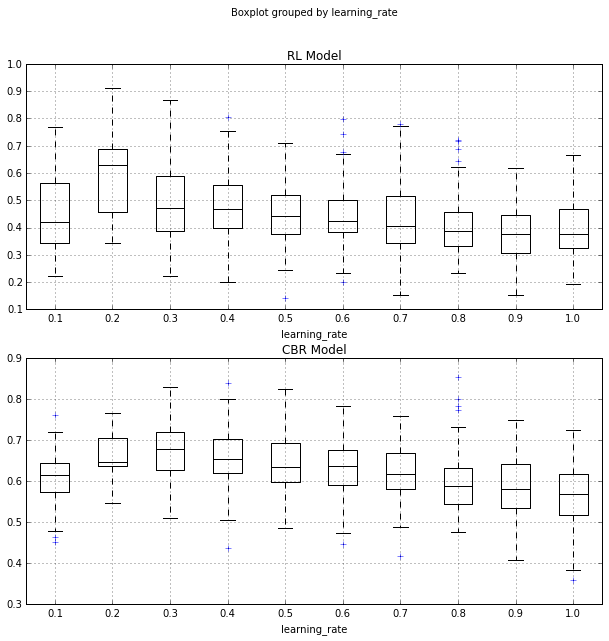

In [12]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bw = rl_qualities.boxplot(column='quality', by='learning_rate', ax=ax1, return_type='dict')
for key in ["boxes", "whiskers", "medians"]:
    plt.setp(bw["quality"][key], color="k")


bw = cb_qualities.boxplot(column='quality', by='learning_rate', ax=ax2, return_type='dict')
for key in ["boxes", "whiskers", "medians"]:
    plt.setp(bw["quality"][key], color="k")

ax1.set_title("RL Model")
ax2.set_title("CBR Model")

In [13]:
bw["quality"].keys()

dict_keys(['means', 'medians', 'fliers', 'caps', 'boxes', 'whiskers'])

In [14]:
rl_qualities["Const."] = 1
cb_qualities["Const."] = 1

In [15]:
rl_lm = sm.OLS(rl_qualities.quality, rl_qualities[["Const.", "learning_rate"]]).fit()
print(rl_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sat, 16 Jan 2016   Prob (F-statistic):           3.01e-26
Time:                        12:50:07   Log-Likelihood:                 595.68
No. Observations:                1000   AIC:                            -1187.
Df Residuals:                     998   BIC:                            -1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Const.            0.5412      0.009     59.344

In [16]:
rl_lm = ols("quality ~ C(learning_rate)", data=rl_qualities).fit()
anova_lm(rl_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(learning_rate),9,3.596687,0.399632,24.254538,8.910833e-38
Residual,990,16.311817,0.016477,NaN,NaN


In [17]:
cb_lm = sm.OLS(cb_qualities.quality, cb_qualities[["Const.", "learning_rate"]]).fit()
print(cb_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sat, 16 Jan 2016   Prob (F-statistic):           1.49e-27
Time:                        12:50:07   Log-Likelihood:                 1256.8
No. Observations:                1000   AIC:                            -2510.
Df Residuals:                     998   BIC:                            -2500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Const.            0.6712      0.005    142.553

In [18]:
cb_lm = ols("quality ~ C(learning_rate)", data=cb_qualities).fit()
anova_lm(cb_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(learning_rate),9,1.107838,0.123093,28.806045,9.797784e-45
Residual,990,4.230437,0.004273,NaN,NaN


## Logit regression(s)

In [19]:
rl_table_full = rl_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
rl_table = rl_table[rl_table.Step>=50]

In [20]:
rl_outcomes = pd.get_dummies(rl_table.Outcome)

rl_predictors = pd.get_dummies(rl_table.SPE)
rl_predictors["Const."] = 1

regressors = [col for col in rl_predictors.columns if col != "StatusQuo"]

In [21]:
logits = {}
for col in rl_outcomes.columns:
    logits[col] = sm.Logit(rl_outcomes[col], rl_predictors[regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.042617
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.288090
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.587512
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.429611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.077086
         Iterations 10


In [22]:
results = summary_col(list(logits.values()), float_format="%0.2f", stars=True)
print(results)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind


              War1   StatusQuo Capitulate1   War2   Capitulate2
---------------------------------------------------------------
Capitulate1 -1.49*** -0.04***  2.73***     1.19***  0.76***    
            (0.01)   (0.00)    (0.01)      (0.01)   (0.01)     
Capitulate2 -0.93*** -0.42***  1.79***     -0.99*** 1.43***    
            (0.01)   (0.00)    (0.01)      (0.02)   (0.00)     
War1        0.13***  -0.08***  -0.52***    1.30***  -0.41***   
            (0.00)   (0.00)    (0.02)      (0.01)   (0.00)     
Const.      -1.55*** 1.05***   -5.63***    -4.79*** -2.55***   
            (0.00)   (0.00)    (0.01)      (0.01)   (0.00)     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [28]:
print(results.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
            &   War1   & StatusQuo & Capitulate1 &   War2   & Capitulate2  \\
\hline
\hline
\end{tabular}
\begin{tabular}{llllll}
Capitulate1 & -1.49*** & -0.04***  & 2.73***     & 1.19***  & 0.76***      \\
            & (0.01)   & (0.00)    & (0.01)      & (0.01)   & (0.01)       \\
Capitulate2 & -0.93*** & -0.42***  & 1.79***     & -0.99*** & 1.43***      \\
            & (0.01)   & (0.00)    & (0.01)      & (0.02)   & (0.00)       \\
War1        & 0.13***  & -0.08***  & -0.52***    & 1.30***  & -0.41***     \\
            & (0.00)   & (0.00)    & (0.02)      & (0.01)   & (0.00)       \\
Const.      & -1.55*** & 1.05***   & -5.63***    & -4.79*** & -2.55***     \\
            & (0.00)   & (0.00)    & (0.01)      & (0.01)   & (0.00)       \\
\hline
\end{tabular}
\end{center}
\end{table}


In [24]:
fit = sm.MNLogit(rl_table.Outcome, rl_predictors[regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.816398
         Iterations 8


In [25]:
print(fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                Outcome   No. Observations:              4500000
Model:                        MNLogit   Df Residuals:                  4499984
Method:                           MLE   Df Model:                           12
Date:                Sat, 16 Jan 2016   Pseudo R-squ.:                 0.04259
Time:                        15:08:59   Log-Likelihood:            -3.6738e+06
converged:                       True   LL-Null:                   -3.8372e+06
                                        LLR p-value:                     0.000
Outcome=Capitulate2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Capitulate1            -2.0023      0.015   -132.413      0.000        -2.032    -1.973
Capitulate2            -0.5528      0.015    -36.854      0.000        -0.582    -0.523
War1            

In [29]:
cb_table_full = cb_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
cb_table = cb_table[cb_table.Step>=50]

cb_outcomes = pd.get_dummies(cb_table.Outcome)

cb_predictors = pd.get_dummies(cb_table.SPE)
cb_predictors["Const."] = 1

regressors = [col for col in cb_predictors.columns if col != "StatusQuo"]

logits = {}
for col in cb_outcomes.columns:
    logits[col] = sm.Logit(cb_outcomes[col], cb_predictors[regressors]).fit()

results = summary_col(list(logits.values()), float_format="%0.2f", stars=True)
print(results)

Optimization terminated successfully.
         Current function value: 0.072064
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.224245
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.619948
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.549387
         Iterations 7
Optimization terminated successfully.

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind


         Current function value: 0.064474
         Iterations 12

              War1   StatusQuo Capitulate1   War2   Capitulate2
---------------------------------------------------------------
Capitulate1 -1.36*** -0.44***  4.28***     1.88***  0.70***    
            (0.01)   (0.00)    (0.01)      (0.01)   (0.01)     
Capitulate2 -1.98*** -1.08***  0.70***     -3.09*** 3.51***    
            (0.01)   (0.00)    (0.02)      (0.07)   (0.00)     
War1        1.67***  -1.74***  0.46***     0.96***  -0.36***   
            (0.00)   (0.00)    (0.01)      (0.01)   (0.01)     
Const.      -0.70*** 0.48***   -5.35***    -4.89*** -3.23***   
            (0.00)   (0.00)    (0.01)      (0.01)   (0.00)     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [30]:
print(results.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
            &   War1   & StatusQuo & Capitulate1 &   War2   & Capitulate2  \\
\hline
\hline
\end{tabular}
\begin{tabular}{llllll}
Capitulate1 & -1.36*** & -0.44***  & 4.28***     & 1.88***  & 0.70***      \\
            & (0.01)   & (0.00)    & (0.01)      & (0.01)   & (0.01)       \\
Capitulate2 & -1.98*** & -1.08***  & 0.70***     & -3.09*** & 3.51***      \\
            & (0.01)   & (0.00)    & (0.02)      & (0.07)   & (0.00)       \\
War1        & 1.67***  & -1.74***  & 0.46***     & 0.96***  & -0.36***     \\
            & (0.00)   & (0.00)    & (0.01)      & (0.01)   & (0.01)       \\
Const.      & -0.70*** & 0.48***   & -5.35***    & -4.89*** & -3.23***     \\
            & (0.00)   & (0.00)    & (0.01)      & (0.01)   & (0.00)       \\
\hline
\end{tabular}
\end{center}
\end{table}


### Testing: One logit per run

In [25]:
[col for col in rl_predictors.columns if col != "StatusQuo"]

['Capitulate1', 'Capitulate2', 'War1', 'Const.']

In [ ]:
coeffs = defaultdict(list)
missing = 0
not_converged = 0
errors = 0

for seed, group in rl_table.groupby("Seed"):
    #group = group[group.Step>=50]
    outcomes = pd.get_dummies(group.Outcome)
    predictors = pd.get_dummies(group.SPE)
    predictors["Const."] = 1
    if "War2" not in outcomes.columns:
        missing += 1
        outcomes["War2"] = 0
    #regressors = [col for col in predictors.columns if col != "StatusQuo"]
    regressors = ['Capitulate1', 'Capitulate2', 'War1', 'War2', 'Const.']
    for col in regressors:
        if col not in predictors.columns:
            predictors[col] = 0
    try:
        fit = sm.Logit(outcomes["War2"], predictors[regressors]).fit(disp=False)
    except Exception as e:
        raise e
    #except:
    #    errors += 1
    #    continue
    if not fit.mle_retvals["converged"]:
        not_converged += 1
        continue
    for coef, val in fit.params.items():
        coeffs[coef].append(val)

In [ ]:
print("Missing: {}".format(missing))
print("Didn't Converge: {}".format(not_converged))
print("Errors: {}".format(errors))

In [ ]:
fig = plt.figure(figsize=(12, 6))
i = 1
for coeff, vals in coeffs.items():
    ax = fig.add_subplot(2, 3, i)
    ax.hist(vals, bins=20)
    ax.set_title(coeff)
    i += 1
    print("{}: {}".format(coeff, len(vals)))

In [ ]:
fig = plt.figure(figsize=(12, 6))
i = 1
for coeff, vals in coeffs.items():
    ax = fig.add_subplot(2, 3, i)
    if coeff != "Const.":
        ax.hist(vals, bins=np.linspace(-2, 2, 21))
    else:
        ax.hist(vals)
    ax.set_title(coeff)
    i += 1
    print("{}: {}".format(coeff, np.mean(vals)))